<a href="https://colab.research.google.com/github/hijyun/music-recommedation-system-based-on-text/blob/main/data%26preprocessing/trainX_%EB%A7%8C%EB%93%A4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 읽기

In [ ]:
import pandas as pd
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords 
import re
import numpy as np

In [ ]:
df_original = pd.read_csv('data/modern_romeo_and_juliet.csv',encoding='cp949')

In [ ]:
df_original.head()

,actscene,contents
0,"Act 1, Scene 1",It was hot. Sizzling. Even at eight o’clock.\n...
1,"Act 1, Scene 2","‘No,’ Capulet told his visitor. ‘It’s six of o..."
2,"Act 1, Scene 3",Lady Capulet came into the sitting room where ...
3,"Act 1, Scene 4",‘Are we going to make some excuse for coming w...
4,"Act 2, Scene 1",Romeo couldn’t bear to leave the house where h...


In [ ]:
df_original.tail()

,actscene,contents
17,"Act 4, Scene 3",Juliet didn’t argue with the Nurse’s choice of...
18,"Act 4, Scene 5",‘Mistress. Wake up… Juliet?’. The Nurse stood ...
19,"Act 5, Scene 1",Romeo had been in a good mood all morning. He’...
20,"Act 5, Scene 2",Friar Lawrence was humming. It was all working...
21,"Act 5, Scene 3","Paris approached the churchyard, his page walk..."


In [ ]:
df_original['act'] = np.arange(22)
df_original['scene'] = np.arange(22)
for i in range(len(df_original)):
    df_original.iloc[i,2] = df_original.iloc[i,0][:5]
    df_original.iloc[i,3] = df_original.iloc[i,0][7:]

In [ ]:
df_original.iloc[0,1][:1000]

'It was hot. Sizzling. Even at eight o’clock.\n\nVerona was coming to life: people poured out of the houses and filled the streets while market traders set up their stalls in the grand piazza. It was a good patch, an excellent place to catch the business of those who lived and worked in the rich houses that lined Verona’s main square.\n\nThe Capulet mansion was one of the biggest ? filled with servants and humming with activity. It was an hour till breakfast and while the cooks sweated over the fires in the kitchen, conjuring mouthwatering aromas of baked breads and hams, the servingmen killed time as best they could.\n\nTwo of them ? hot, bored and restless ? stepped out into the bustle of the piazza and swaggered about among the bright colours, the animal smells and the din of traders’ voices, hoping to find some action.\n\n‘I can tell you, Gregory,’ said Sampson, ‘I’m ready for them. Just watch me. Let a Montague so much as put a foot in the piazza and you’ll see how quick I am.’\n\

In [ ]:
df = df_original.drop(['actscene'],axis=1)

In [ ]:
df.head()

,contents,act,scene
0,It was hot. Sizzling. Even at eight o’clock.\n...,Act 1,Scene 1
1,"‘No,’ Capulet told his visitor. ‘It’s six of o...",Act 1,Scene 2
2,Lady Capulet came into the sitting room where ...,Act 1,Scene 3
3,‘Are we going to make some excuse for coming w...,Act 1,Scene 4
4,Romeo couldn’t bear to leave the house where h...,Act 2,Scene 1


In [ ]:
#df.to_excel('act_scene_split_romeo&juliet.xlsx')

In [ ]:
df.shape

(22, 3)

In [ ]:
df.iloc[0,0][:1000]

'It was hot. Sizzling. Even at eight o’clock.\n\nVerona was coming to life: people poured out of the houses and filled the streets while market traders set up their stalls in the grand piazza. It was a good patch, an excellent place to catch the business of those who lived and worked in the rich houses that lined Verona’s main square.\n\nThe Capulet mansion was one of the biggest ? filled with servants and humming with activity. It was an hour till breakfast and while the cooks sweated over the fires in the kitchen, conjuring mouthwatering aromas of baked breads and hams, the servingmen killed time as best they could.\n\nTwo of them ? hot, bored and restless ? stepped out into the bustle of the piazza and swaggered about among the bright colours, the animal smells and the din of traders’ voices, hoping to find some action.\n\n‘I can tell you, Gregory,’ said Sampson, ‘I’m ready for them. Just watch me. Let a Montague so much as put a foot in the piazza and you’ll see how quick I am.’\n\

In [ ]:
df[['act','scene']].value_counts()

act    scene  
Act 5  Scene 3    1
       Scene 2    1
Act 1  Scene 2    1
       Scene 3    1
       Scene 4    1
Act 2  Scene 1    1
       Scene 2    1
       Scene 3    1
       Scene 4    1
       Scene 5    1
       Scene 6    1
Act 3  Scene 1    1
       Scene 2    1
       Scene 3    1
       Scene 4    1
       Scene 5    1
Act 4  Scene 1    1
       Scene 2    1
       Scene 3    1
       Scene 5    1
Act 5  Scene 1    1
Act 1  Scene 1    1
dtype: int64

# 전처리

In [ ]:
def cleansing(text):
    pattern = '[0-9]' # 숫자제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '\n' 
    text = re.sub(pattern=pattern, repl=' ', string=text)
    pattern = '[^\w\s]' # 특수기호제거
    #pattern = '[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]'
    text = re.sub(pattern=pattern, repl='', string=text)
    text = text.lower() # 소문자로 바꾸기
    return text   

In [ ]:
for i in range(len(df)):
    df.iloc[i,0] = df.iloc[i,0].split('.') # 문장 단위로 쪼개기
    for t in df.iloc[i,0]: 
        df.iloc[i,0] = [cleansing(t) for t in df.iloc[i,0]] # 모든 열에 대해 cleansing함수 적용

In [ ]:
df.iloc[0,0][:10] # 전처리 후 데이터 확인

['it was hot',
 ' sizzling',
 ' even at eight oclock',
 '  verona was coming to life people poured out of the houses and filled the streets while market traders set up their stalls in the grand piazza',
 ' it was a good patch an excellent place to catch the business of those who lived and worked in the rich houses that lined veronas main square',
 '  the capulet mansion was one of the biggest  filled with servants and humming with activity',
 ' it was an hour till breakfast and while the cooks sweated over the fires in the kitchen conjuring mouthwatering aromas of baked breads and hams the servingmen killed time as best they could',
 '  two of them  hot bored and restless  stepped out into the bustle of the piazza and swaggered about among the bright colours the animal smells and the din of traders voices hoping to find some action',
 '  i can tell you gregory said sampson im ready for them',
 ' just watch me']

## 문장 수  세기

In [ ]:
count = []
num = 0
for i in range(len(df)):
    num += len(df.iloc[i,0])
    count.append(len(df.iloc[i,0]))
    print(df.iloc[i,1],',',df.iloc[i,2],':',len(df.iloc[i,0]))
print('전체 문장수 : ' , num)
print(count)
print('100으로 나눈 문장수:' , num/30)
print('min:',min(count))

Act 1 , Scene 1 : 313
Act 1 , Scene 2 : 129
Act 1 , Scene 3 : 101
Act 1 , Scene 4 : 66
Act 2 , Scene 1 : 65
Act 2 , Scene 2 : 166
Act 2 , Scene 3 : 71
Act 2 , Scene 4 : 153
Act 2 , Scene 5 : 79
Act 2 , Scene 6 : 32
Act 3 , Scene 1 : 306
Act 3 , Scene 2 : 91
Act 3 , Scene 3 : 141
Act 3 , Scene 4 : 44
Act 3 , Scene 5 : 204
Act 4 , Scene 1 : 122
Act 4 , Scene 2 : 47
Act 4 , Scene 3 : 46
Act 4 , Scene 5 : 120
Act 5 , Scene 1 : 63
Act 5 , Scene 2 : 30
Act 5 , Scene 3 : 286
전체 문장수 :  2675
[313, 129, 101, 66, 65, 166, 71, 153, 79, 32, 306, 91, 141, 44, 204, 122, 47, 46, 120, 63, 30, 286]
100으로 나눈 문장수: 89.16666666666667
min: 30


### 문장수 시각화

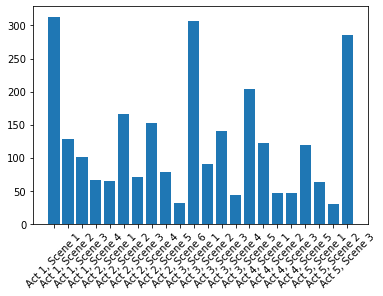

In [ ]:
import matplotlib.pyplot as plt

x = np.arange(22)
actscene = df_original['actscene']
values = [100, 400, 900]

plt.bar(x, count)
plt.xticks(x, actscene, rotation=45)
plt.show()

## 텍스트 102개로 분할
* 글자가 1000~1200씩 되도록 분할. 나눈후 남는 글자는 마지막 텍스트에 들어가도록 조정

In [ ]:
text_list = []
act_list = []
scene_list = []

for  r in range(len(df)):
    n = 30
    result = [df.iloc[r,0][i * n:(i + 1) * n] for i in range((len(df.iloc[r,0]) + n - 1) // n )] 
    for t in result:
        text_list.append(t)
        act_list.append(df.iloc[r,1])
        scene_list.append(df.iloc[r,2])
print('총 데이터 수: ',len(text_list))

총 데이터 수:  102


In [ ]:
df1 = pd.DataFrame(index=range(0,len(text_list)), columns=['text', 'act','scene'])

df1['act'] = act_list
df1['scene'] = scene_list

df1['actscene'] = np.arange(len(df1))
for i in range(len(df1)):
    df1.iloc[i,0] = ''.join(text_list[i])
    df1.iloc[i,3] = df1.iloc[i,1]+df1.iloc[i,2]

In [ ]:
df1.head()

,text,act,scene,actscene
0,it was hot sizzling even at eight oclock vero...,Act 1,Scene 1,Act 1Scene 1
1,ill be right behind you thats what im afraid...,Act 1,Scene 1,Act 1Scene 1
2,im not biting my thumb at you well said the ...,Act 1,Scene 1,Act 1Scene 1
3,look whispered balthasar theres montagues co...,Act 1,Scene 1,Act 1Scene 1
4,he shrugged the end of the young capulets swo...,Act 1,Scene 1,Act 1Scene 1


In [ ]:
df1.tail()

,text,act,scene,actscene
97,someones coming said the friar come juliet co...,Act 5,Scene 3,Act 5Scene 3
98,which way theyre here said juliet i must hur...,Act 5,Scene 3,Act 5Scene 3
99,oh look how hes bleeding said capulet this w...,Act 5,Scene 3,Act 5Scene 3
100,he looked around they were all there montague...,Act 5,Scene 3,Act 5Scene 3
101,he took his old enemys hand and the two men e...,Act 5,Scene 3,Act 5Scene 3


In [ ]:
#df1.to_excel('data/train_X.xlsx',index=False)

In [ ]:
#df1.to_csv('data/train_X.csv',index=False)

## 완성된 train_data 글자수 히스토그램

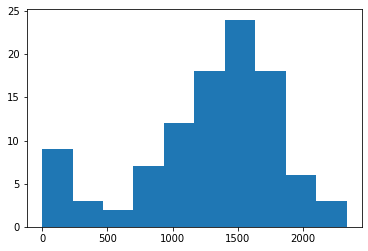

In [ ]:

count_list = [len(r) for r in df1['text']]
x = np.arange(len(df1))
actscene = df1['actscene']

#plt.bar(x, count_list)
#plt.xticks(x, actscene, rotation=45)
plt.hist(count_list)
plt.show()